# Firstly import all python libraries required.   

In [25]:
import os
import re
import pandas as pd 
import numpy as np

# then export the chat(which you want to analyze) from whatsapp in .txt format and give it's path.

How to export chat youtube link--->> https://www.youtube.com/watch?v=Iq52RMQlvDo

In [5]:
whatsapp_file="C:/Users/hp/Desktop/uditchat.txt"

# reading of .txt file is done here.

In [6]:
if os.path.exists(whatsapp_file):
	file_data=open(whatsapp_file,"r",encoding="utf8")
	whatsapp_data=file_data.read()

# For learning about regular expression visit   https://docs.python.org/3/howto/regex.html 

# Now we will extract date from the .txt file using regular expression

In [7]:
date_regex=re.compile(r'(\d+/\d+/\d+)')
date=date_regex.findall(whatsapp_data)

# Now we will extract time from the .txt file using regular expression

In [8]:
time_regex=re.compile(r'(\d{1,2}:\d{2} am|pm )') #here {1,2} means we can have one digit or two digit number here,{2} means only two digit number.
time=time_regex.findall(whatsapp_data)

# Now we will extract user name from the .txt file using regular expression

In [9]:
user_regex=re.compile(r'-(.*?):')
user=user_regex.findall(whatsapp_data)

# Now we will extract chat from the .txt file using regular expression

In [10]:
message_regex=re.compile(r'([^:]+):?$')
mess_regex=re.compile(r'(\n)(?<=)(\d+/\d+/\d+)(.*)')
ms=mess_regex.findall(whatsapp_data)
message=[''.join(message_regex.findall(''.join(msg))).strip() for msg in ms]

# Now we will be taking all above information extracted and append in format we have whatsapp chat

In [11]:
data=[]
for d,t,u,m in zip(date,time,user,message):   
	data.append([str(d),str(t),str(u),str(m)])

# Now we will create a dataframe in same format as our whatsapp chat is.

In [12]:
df=pd.DataFrame(data,columns=("Date","Time","User","Message"))

# here in this step we will be cleaning out the messages.

In [13]:
df["Message"]=df["Message"].str.replace('\'(.*?): ','')

In [14]:
df["Date"]=pd.to_datetime(df["Date"])  

# Getting year from date 

In [15]:
df["Year"]=df["Date"].dt.year 

# Getting month from date

In [16]:
df["Month"]=df["Date"].dt.month 

# Getting day from date

In [17]:
df["Day"]=df["Date"].dt.day

# extracting words from message

In [18]:
df["Words"]=df["Message"].str.strip().str.split('[\W_]+') 

# getting word length from words

In [19]:
df["Word Length"]=df["Words"].apply(len)-2 

# getting whole message length from message

In [20]:
df["Message Length"]=df["Message"].map(str).apply(len)-3 

# getting any media file if exist in message

In [21]:
df["Media"]=df["Message"].str.contains("<Media omited>")

# one of the most important step to create a csv file from the data you extracted

In [22]:
df.to_csv("whatsappchat.csv")

In [23]:
print(df.head()) # df.head() will give us the table of containing all columns and first 5 rows.

        Date Time               User  \
0 2018-03-04  pm           Udit Ipec   
1 2018-03-04  pm    Nainish Aggarwal   
2 2018-03-04  pm           Udit Ipec   
3 2018-03-04  pm    Nainish Aggarwal   
4 2018-03-04  pm           Udit Ipec   

                                    Message  Year  Month  Day  \
0                              Kl jana h..?  2018      3    4   
1                                 Pata. Nhi  2018      3    4   
2                                 Tu jaega?  2018      3    4   
3  Han bhai koi information hai nhi kal. Ki  2018      3    4   
4                                        Oi  2018      3    4   

                                              Words  Word Length  \
0                                   [Kl, jana, h, ]            2   
1                                       [Pata, Nhi]            0   
2                                     [Tu, jaega, ]            1   
3  [Han, bhai, koi, information, hai, nhi, kal, Ki]            6   
4                           

In [24]:
print(df.shape[0])

3609


In [30]:
print(df.describe())

              Year        Month          Day  Word Length  Message Length
count  3609.000000  3609.000000  3609.000000  3609.000000     3609.000000
mean   2018.794126     4.903851    13.709061     1.879468       13.657246
std       0.404395     3.345233     8.755969     3.332239       16.806425
min    2018.000000     1.000000     1.000000    -1.000000       -2.000000
25%    2019.000000     3.000000     5.000000     0.000000        1.000000
50%    2019.000000     4.000000    17.000000     1.000000       10.000000
75%    2019.000000     7.000000    20.000000     3.000000       20.000000
max    2019.000000    12.000000    31.000000    36.000000      185.000000


In [32]:
print(df.columns)

Index(['Date', 'Time', 'User', 'Message', 'Year', 'Month', 'Day', 'Words',
       'Word Length', 'Message Length', 'Media'],
      dtype='object')


In [34]:
dates_summary=df.groupby("Date")["Date"].count()
print(dates_summary)

Date
2018-01-05      7
2018-01-11     12
2018-01-12      2
2018-02-11      2
2018-03-04      7
2018-03-11      4
2018-04-14     25
2018-04-17      9
2018-04-18     20
2018-04-19     43
2018-04-22      1
2018-04-26      9
2018-04-30      2
2018-05-04      4
2018-05-11      9
2018-05-13     18
2018-05-14      1
2018-05-16      1
2018-06-05     20
2018-06-11      9
2018-07-05      5
2018-07-11      7
2018-07-12     26
2018-08-04      1
2018-08-05     10
2018-08-12     32
2018-09-05     15
2018-09-12      4
2018-10-05      9
2018-10-11     10
             ... 
2019-04-17     44
2019-04-19    224
2019-04-20     11
2019-04-21     48
2019-04-22     20
2019-04-24     11
2019-04-25      2
2019-04-26     20
2019-04-29      6
2019-05-03      6
2019-05-04      8
2019-06-03     51
2019-06-04     89
2019-07-01    103
2019-07-04     17
2019-08-01     48
2019-08-03      1
2019-08-04     25
2019-09-01     22
2019-09-02     69
2019-09-04      1
2019-10-01     21
2019-10-02      8
2019-10-03     28
2019-

In [35]:
user_summary=df.groupby("User")["User"].count()
print(user_summary)

User
 Nainish Aggarwal    1974
 Udit Ipec           1635
Name: User, dtype: int64


In [37]:
message_summary=df.groupby("User")["Message"].count()
print(message_summary)

User
 Nainish Aggarwal    1974
 Udit Ipec           1635
Name: Message, dtype: int64


In [38]:
year_summary=df.groupby("Year")["Year"].count()
print(year_summary)

Year
2018     743
2019    2866
Name: Year, dtype: int64


In [11]:
month_summary=df.groupby("Month")["Month"].count()
print(month_summary)

Month
1     292
2     584
3     856
4     672
5      47
6     169
7     158
8     117
9     111
10    140
11    264
12    199
Name: Month, dtype: int64


In [26]:
year_month=df.groupby(['Year','Month'])['Month'].count()
print(year_month)

Year  Month
2018  1         21
      2          2
      3         11
      4        109
      5         33
      6         29
      7         38
      8         43
      9         19
      10        82
      11       220
      12       136
2019  1        271
      2        582
      3        845
      4        563
      5         14
      6        140
      7        120
      8         74
      9         92
      10        58
      11        44
      12        63
Name: Month, dtype: int64


In [27]:
year_day=df.groupby(['Year','Day'])['Day'].count()
print(year_day)

Year  Day
2018  4       12
      5       66
      11      57
      12      65
      13      28
      14      75
      15      11
      16      16
      17       9
      18      20
      19      51
      22       1
      24      47
      25       9
      26      33
      27      28
      28     104
      29      20
      30      41
      31      50
2019  1      220
      2       82
      3      224
      4      361
      5      399
      13      57
      14      33
      15      71
      16      27
      17      50
      18     289
      19     366
      20     219
      21     195
      22     151
      23       6
      24      37
      25      12
      26      53
      27       1
      29       6
      30       7
Name: Day, dtype: int64


In [29]:
char_length=df.groupby(['User'])['Message Length'].sum()
print(char_length)

User
 Nainish Aggarwal    27578
 Udit Ipec           21644
Name: Message Length, dtype: int64


In [30]:
word_length=df.groupby(['User'])['Word Length'].sum()
print(word_length)

User
 Nainish Aggarwal    3738
 Udit Ipec           3032
Name: Word Length, dtype: int64


In [31]:
media=df.groupby(['Media'])['Media'].sum()
print(media)

Media
False    False
Name: Media, dtype: bool


In [32]:
media_df=df[df['Media']==True]
media_per_user=media_df.groupby(['User','Media'])['Media'].count()
print(media_per_user)

Series([], Name: Media, dtype: int64)


# Visualization Phase

# No. of users with there message count is shown using bar graph

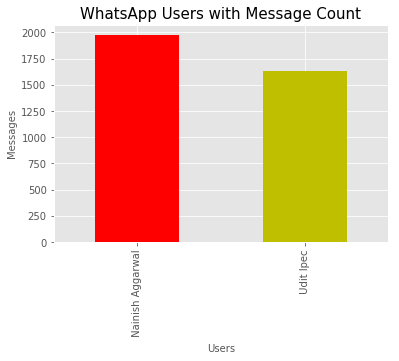

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
 
plt.grid()    
users=df.groupby('User')['User'].count().nlargest(15) #nlargest(n) is used to get largest n data

a=users.plot(kind="bar",color=["r","y"])
a.set_title("WhatsApp Users with Message Count", fontsize=15)
a.set_xlabel("Users", fontsize=10)
a.set_ylabel("Messages", fontsize=10)
plt.show()

# No. of users with there message count is shown using pie chart

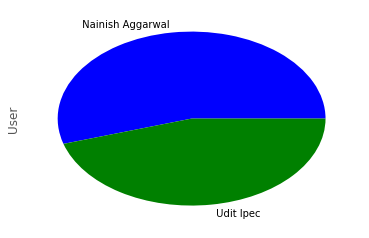

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

users=df.groupby('User')['User'].count()
a=users.plot(kind="pie",colors=["b","g"])
plt.show()

# Distribution of dates with user chats

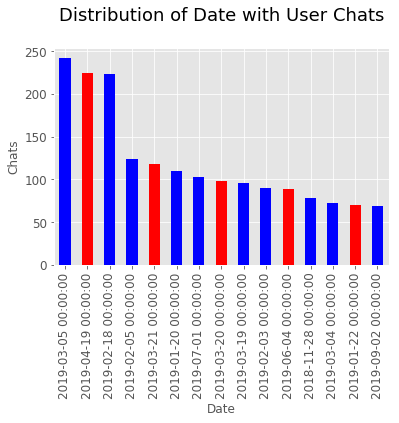

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.grid()

dates_summary=df.groupby("Date")["Date"].count().nlargest(15)
a=dates_summary.plot(kind='bar', color = ["b","r"], fontsize=12)
a.set_title("Distribution of Date with User Chats\n", fontsize=18)
a.set_xlabel("Date", fontsize=12)
a.set_ylabel("Chats", fontsize=12)
plt.show()

# Distribution of Date with User Chats using line graph

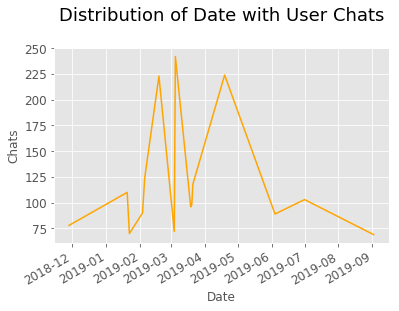

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.grid()
dates_summary=df.groupby("Date")["Date"].count().nlargest(15)
a=dates_summary.plot(kind='line', color = ["orange"], fontsize=12)
a.set_title("Distribution of Date with User Chats\n", fontsize=18)
a.set_xlabel("Date", fontsize=12)
a.set_ylabel("Chats", fontsize=12)
plt.show()


# Distribution of User With Word Count using bar graph

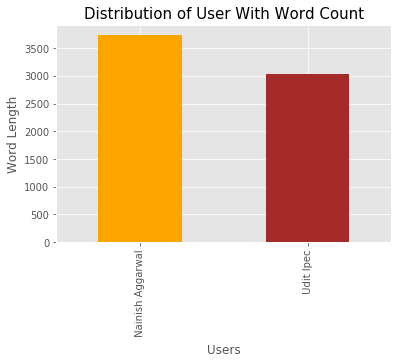

In [55]:
import matplotlib.pyplot as plt

word_length=df.groupby(['User'])['Word Length'].sum().nlargest(15)
a=word_length.plot(kind="bar",color=["orange","brown"])
a.set_title("Distribution of User With Word Count", fontsize=15)
a.set_xlabel("Users", fontsize=12)
a.set_ylabel("Word Length", fontsize=12)
plt.show()


# Active Months using bar graph

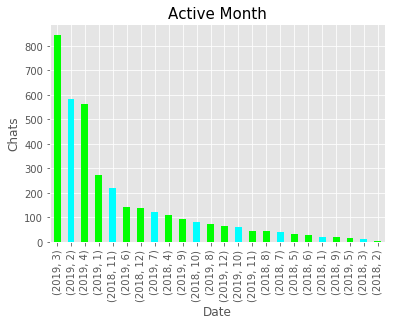

In [56]:
import matplotlib.pyplot as plt
plt.grid()

active_month=df.groupby(['Year','Month'])['Month'].count().nlargest(25)
a=active_month.plot(kind="bar",color=["lime","cyan"])
a.set_title("Active Month", fontsize=15)
a.set_xlabel("Date", fontsize=12)
a.set_ylabel("Chats", fontsize=12)
plt.show()